# Application of MScausality to the experiment from Talus

In [2]:
import MScausality.data_analysis.gene_set as gs
import MScausality.data_analysis.normalization as norm
# from MScausality.graph_construction.indra_networks import analysis_uniprot, pull_small_molecules
from MScausality.graph_construction.graph import GraphBuilder
from MScausality.causal_model.LVM import LVM

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

# from indra_cogex.client import Neo4jClient
from y0.dsl import Variable

# from indra_cogex.client import Neo4jClient
pd.set_option('display.max_rows', 100)
%matplotlib inline

from dotenv import load_dotenv 
load_dotenv()

In [3]:
msstats_data_all = pd.read_csv("../../data/Talus/processed_data/ProteinLevelData.csv")
msstats_data = msstats_data_all[msstats_data_all["GROUP"] == "DMSO"]

In [105]:
msstats_model = pd.read_csv("../../data/Talus/processed_data/model.csv")

In [106]:
msstats_data_all.head()

,RUN,Protein,LogIntensities,originalRUN,GROUP,SUBJECT,TotalGroupMeasurements,NumMeasuredFeature,MissingPercentage,more50missing,NumImputedFeature
0,1,1433B_HUMAN,12.873423,230719_THP-1_Chrom_end2end_Plate1_DMSO_A02_DIA,DMSO,2,1210,10,0.0,False,0
1,2,1433B_HUMAN,12.866217,230719_THP-1_Chrom_end2end_Plate1_DMSO_A05_DIA,DMSO,5,1210,10,0.0,False,0
2,3,1433B_HUMAN,12.686827,230719_THP-1_Chrom_end2end_Plate1_DMSO_A10_DIA,DMSO,10,1210,10,0.0,False,0
3,4,1433B_HUMAN,12.625462,230719_THP-1_Chrom_end2end_Plate1_DMSO_A12_DIA,DMSO,12,1210,10,0.0,False,0
4,5,1433B_HUMAN,12.538365,230719_THP-1_Chrom_end2end_Plate1_DMSO_B01_DIA,DMSO,13,1210,10,0.0,False,0


## Fold change in model

In [111]:
msstats_model.loc[(msstats_model["Label"] == "DMSO-DbET6") & \
                  (msstats_model["adj.pvalue"] < .05) & \
                  (np.isfinite(msstats_model["log2FC"]))]

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,issue,MissingPercentage,ImputationPercentage
19890,BRD2_HUMAN,DMSO-DbET6,2.046185,0.114339,17.895836,260.0,0.000000e+00,0.000000e+00,NaN,0.310067,0.0
19935,BRD3_HUMAN,DMSO-DbET6,3.333428,0.126571,26.336522,257.0,0.000000e+00,0.000000e+00,NaN,0.252349,0.0
19980,BRD4_HUMAN,DMSO-DbET6,2.668935,0.101283,26.351317,257.0,0.000000e+00,0.000000e+00,NaN,0.118121,0.0
27900,CEBPZ_HUMAN,DMSO-DbET6,-0.291059,0.074340,-3.915236,260.0,1.154421e-04,3.005139e-02,NaN,0.059060,0.0
37530,CRNL1_HUMAN,DMSO-DbET6,-0.268054,0.069816,-3.839419,260.0,1.549581e-04,3.832114e-02,NaN,0.027517,0.0
41580,DAZP1_HUMAN,DMSO-DbET6,0.617508,0.099537,6.203818,260.0,2.159950e-09,1.780518e-06,NaN,0.286577,0.0
66060,FUBP2_HUMAN,DMSO-DbET6,0.291045,0.077226,3.768747,260.0,2.030526e-04,4.782372e-02,NaN,0.017450,0.0
66105,FUBP3_HUMAN,DMSO-DbET6,0.300410,0.069882,4.298798,260.0,2.430235e-05,8.941156e-03,NaN,0.095302,0.0
72855,GTPB4_HUMAN,DMSO-DbET6,-0.344029,0.087806,-3.918077,260.0,1.141655e-04,3.005139e-02,NaN,0.020134,0.0
75735,HEAT3_HUMAN,DMSO-DbET6,-0.409029,0.100056,-4.087980,260.0,5.804139e-05,1.794204e-02,NaN,0.127517,0.0


In [117]:
msstats_model.loc[(msstats_model["Label"] == "DMSO-DbET6") & \
                  (np.isfinite(msstats_model["log2FC"]))].sort_values("log2FC", key=abs).tail(20)

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,issue,MissingPercentage,ImputationPercentage
56790,ENOA_HUMAN,DMSO-DbET6,0.939719,0.258508,3.635167,212.0,0.000349,0.062472,NaN,0.503356,0.0
86130,ITIH2_HUMAN,DMSO-DbET6,0.983093,0.968390,1.015183,6.0,0.349193,0.999700,NaN,0.955705,0.0
17595,BAZ2B_HUMAN,DMSO-DbET6,0.986227,0.486065,2.029004,110.0,0.044873,0.999700,NaN,0.738255,0.0
130815,PEBP1_HUMAN,DMSO-DbET6,0.996033,0.701965,1.418922,50.0,0.162126,0.999700,NaN,0.895973,0.0
82440,IFT80_HUMAN,DMSO-DbET6,-1.004251,0.601551,-1.669435,19.0,0.111425,0.999700,NaN,0.875839,0.0
11025,ARGI1_HUMAN,DMSO-DbET6,-1.028421,1.283442,-0.801299,12.0,0.438537,0.999700,NaN,0.944295,0.0
127980,PARK7_HUMAN,DMSO-DbET6,-1.121847,0.561263,-1.998788,66.0,0.049753,0.999700,NaN,0.903356,0.0
167805,S10AE_HUMAN,DMSO-DbET6,-1.142022,1.813786,-0.629634,10.0,0.543051,0.999700,NaN,0.940268,0.0
56835,ENOB_HUMAN,DMSO-DbET6,1.177672,0.390995,3.011984,167.0,0.002999,0.268706,NaN,0.342282,0.0
199305,TMTC3_HUMAN,DMSO-DbET6,1.267081,0.654085,1.937182,92.0,0.055791,0.999700,NaN,0.819463,0.0


<Axes: >

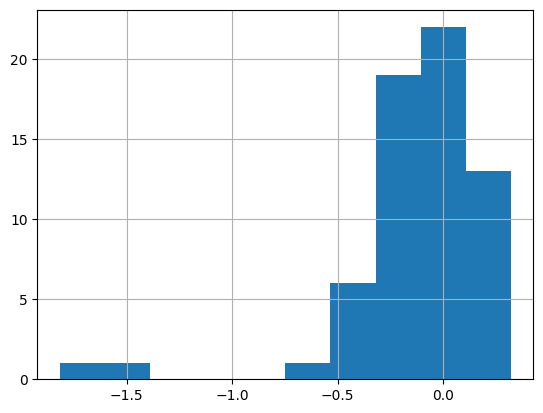

In [138]:
input_data.loc[:, "BAZ2B"].hist()

## Normalize Data

In [118]:
msstats_data = norm.normalize(msstats_data)

## Find gene sets with high correlation

In [119]:
input_data = gs.prep_msstats_data(msstats_data, gene_map=None, parse_gene=True)
input_data = input_data.reset_index(drop=True)
input_data.columns.name = None
corr_data = gs.gen_correlation_matrix(input_data, methods=["pearson"], abs_corr=True)

/Users/kohler.d/Library/CloudStorage/OneDrive-NortheasternUniversity/Northeastern/Research/Causal_Inference/MS_causal_inference/MScausality/src/MScausality/data_analysis/gene_set.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Protein'] = data['Protein'].apply(lambda x: x.split("_")[0])


Correlation matrix for pearson:


In [6]:
corr_data["pearson"].head()

,value,index
1,0.302693,"(1433E, 1433F)"
2,0.595719,"(1433E, 1433G)"
3,0.274060,"(1433E, 1433S)"
4,0.530000,"(1433E, 1433T)"
5,0.550275,"(1433E, 1433Z)"


### Regulatory pathways

In [22]:
regulatory_paths = gs.test_gene_sets(corr_data, input_data.columns.values, "../../data/gene_sets/regulatory_pathways.json", threshold=0.33)
regulatory_paths

AAANWWTGC_UNKNOWN
AAAYRNCTG_UNKNOWN
AAAYWAACM_HFH4_01
AACTTT_UNKNOWN
AACWWCAANK_UNKNOWN
AACYNNNNTTCCS_UNKNOWN
AAGWWRNYGGC_UNKNOWN
ACAWNRNSRCGG_UNKNOWN
ACAWYAAAG_UNKNOWN
ACCTGTTG_UNKNOWN
ACTAYRNNNCCCR_UNKNOWN
ACTWSNACTNY_UNKNOWN
ADA2_TARGET_GENES
ADCYAP1_TARGET_GENES
ADNP_TARGET_GENES
AEBP2_TARGET_GENES
AFP1_Q6
AGCYRWTTC_UNKNOWN
AHR_01
AHR_Q5
AHRARNT_01
AHRARNT_02
AHRR_TARGET_GENES
ALKBH3_TARGET_GENES
ALPHACP1_01
ALX4_01
ALX4_TARGET_GENES
AMEF2_Q6
AML1_01
AML1_Q6
AML_Q6
AP1_01
AP1_C
AP1_Q2
AP1_Q2_01
AP1_Q4
AP1_Q4_01
AP1_Q6
AP1_Q6_01
AP1FJ_Q2
AP2_Q3
AP2_Q6
AP2_Q6_01
AP2ALPHA_01
AP2GAMMA_01
AP2REP_01
AP3_Q6
AP4_01
AP4_Q5
AP4_Q6
AP4_Q6_01
AR_01
AR_02
AR_03
AR_Q2
AR_Q6
AREB6_01
AREB6_02
AREB6_03
AREB6_04
ARGGGTTAA_UNKNOWN
ARHGAP35_TARGET_GENES
ARID3B_TARGET_GENES
ARID5B_TARGET_GENES
ARNT2_TARGET_GENES
ARNT_01
ARNT_02
ARP1_01
ASH1L_TARGET_GENES
ASXL2_TARGET_GENES
ATCMNTCCGY_UNKNOWN
ATF1_Q6
ATF3_Q6
ATF4_Q2
ATF5_TARGET_GENES
ATF6_01
ATF6_TARGET_GENES
ATF_01
ATF_B
ATGGYGGA_UNKNOWN
ATM_TARGET_GE

KeyboardInterrupt: 

In [120]:
brd2_sets = gs.find_sets_with_gene(["BRD2"], "../../data/gene_sets/regulatory_pathways.json")
brd3_sets = gs.find_sets_with_gene(["BRD3"], "../../data/gene_sets/regulatory_pathways.json")
brd4_sets = gs.find_sets_with_gene(["BRD4"], "../../data/gene_sets/regulatory_pathways.json")
brd_sets = gs.find_sets_with_gene(["BRD2", "BRD3", "BRD4"], "../../data/gene_sets/regulatory_pathways.json")
men1_sets = gs.find_sets_with_gene(["MEN1"], "../../data/gene_sets/regulatory_pathways.json")

In [82]:
regulatory_paths[regulatory_paths["pathway"].isin(brd2_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
490,MDM2_TARGET_GENES,pearson,13,3,0.230769,3,2,0.666667
733,SIX1_TARGET_GENES,pearson,380,55,0.144737,1485,476,0.320539
667,PSMB5_TARGET_GENES,pearson,309,43,0.139159,903,288,0.318937
99,CACCCBINDINGFACTOR_Q6,pearson,271,48,0.177122,1128,335,0.296986
248,EGR_Q6,pearson,280,50,0.178571,1225,349,0.284898
336,GGCNKCCATNK_UNKNOWN,pearson,121,42,0.347107,861,228,0.264808
534,MZF1_01,pearson,240,49,0.204167,1176,301,0.255952
975,ZNF175_TARGET_GENES,pearson,866,147,0.169746,10731,2691,0.250769
726,SETD7_TARGET_GENES,pearson,1002,182,0.181637,16471,4050,0.245887
85,BACH2_01,pearson,273,38,0.139194,703,171,0.243243


In [10]:
regulatory_paths[regulatory_paths["pathway"].isin(brd3_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
1101,ZNF8_TARGET_GENES,pearson,1055,173,0.163981,14878,2806,0.188601
558,NFMUE1_Q6,pearson,250,88,0.352000,3828,713,0.186259
227,E2F5_TARGET_GENES,pearson,1289,237,0.183863,27966,5204,0.186083
539,NCOA4_TARGET_GENES,pearson,1100,211,0.191818,22155,4075,0.183931
486,MCM2_TARGET_GENES,pearson,88,22,0.250000,231,42,0.181818
447,KAT2A_TARGET_GENES,pearson,1166,251,0.215266,31375,5634,0.179570
1015,ZNF394_TARGET_GENES,pearson,1129,190,0.168291,17955,3054,0.170092
1108,ZSCAN30_TARGET_GENES,pearson,1782,301,0.168911,45150,7520,0.166556
369,HDGF_TARGET_GENES,pearson,928,161,0.173491,12880,2130,0.165373
996,ZNF282_TARGET_GENES,pearson,1074,194,0.180633,18721,3084,0.164735


In [83]:
regulatory_paths[regulatory_paths["pathway"].isin(brd4_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
860,TGGNNNNNNKCCAR_UNKNOWN,pearson,436,46,0.105505,1035,275,0.265700
534,MZF1_01,pearson,240,49,0.204167,1176,301,0.255952
45,AP2REP_01,pearson,182,24,0.131868,276,70,0.253623
984,ZNF223_TARGET_GENES,pearson,329,48,0.145897,1128,279,0.247340
50,AP4_Q6_01,pearson,257,34,0.132296,561,138,0.245989
322,GCANCTGNY_MYOD_Q6,pearson,936,136,0.145299,9180,2208,0.240523
227,E2F5_TARGET_GENES,pearson,1289,237,0.183863,27966,6418,0.229493
370,HEB_Q6,pearson,268,40,0.149254,780,176,0.225641
341,GGGTGGRR_PAX4_03,pearson,1310,213,0.162595,22578,5085,0.225219
660,PR_Q2,pearson,269,31,0.115242,465,102,0.219355


In [84]:
regulatory_paths[regulatory_paths["pathway"].isin(brd_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent


In [85]:
regulatory_paths[regulatory_paths["pathway"].isin(men1_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
1058,ZNF581_TARGET_GENES,pearson,334,61,0.182635,1830,462,0.252459
321,GATTGGY_NFY_Q6_01,pearson,1177,224,0.190314,24976,6016,0.240871
720,SAFB2_TARGET_GENES,pearson,814,146,0.179361,10585,2475,0.233821
370,HEB_Q6,pearson,268,40,0.149254,780,176,0.225641
341,GGGTGGRR_PAX4_03,pearson,1310,213,0.162595,22578,5085,0.225219
669,PTPRA_TARGET_GENES,pearson,130,20,0.153846,190,42,0.221053
721,SALL4_TARGET_GENES,pearson,1870,360,0.192513,64620,14033,0.217162
358,GTGGGTGK_UNKNOWN,pearson,298,39,0.130872,741,154,0.207827
1015,ZNF394_TARGET_GENES,pearson,1129,190,0.168291,17955,3697,0.205904
1110,ZSCAN4_TARGET_GENES,pearson,1458,194,0.133059,18721,3807,0.203355


### Hallmark pathways

In [121]:
hallmark_paths = gs.test_gene_sets(corr_data, "../../data/gene_sets/hallmark_pathways.json", threshold=0.33)
hallmark_paths.head()

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
0,HALLMARK_ADIPOGENESIS,pearson,200,35,0.175000,595,112,0.188235
1,HALLMARK_ALLOGRAFT_REJECTION,pearson,200,26,0.130000,325,68,0.209231
2,HALLMARK_ANDROGEN_RESPONSE,pearson,101,18,0.178218,153,30,0.196078
3,HALLMARK_ANGIOGENESIS,pearson,36,4,0.111111,6,1,0.166667
4,HALLMARK_APICAL_JUNCTION,pearson,200,39,0.195000,741,178,0.240216


In [122]:
brd2_sets = gs.find_sets_with_gene(["BRD2"], "../../data/gene_sets/hallmark_pathways.json")
brd3_sets = gs.find_sets_with_gene(["BRD3"], "../../data/gene_sets/hallmark_pathways.json")
brd4_sets = gs.find_sets_with_gene(["BRD4"], "../../data/gene_sets/hallmark_pathways.json")
men1_sets = gs.find_sets_with_gene(["MEN1"], "../../data/gene_sets/hallmark_pathways.json")

In [88]:
hallmark_paths[hallmark_paths["pathway"].isin(brd2_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent


In [89]:
hallmark_paths[hallmark_paths["pathway"].isin(brd3_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent


In [90]:
hallmark_paths[hallmark_paths["pathway"].isin(brd4_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent


In [91]:
hallmark_paths[hallmark_paths["pathway"].isin(men1_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent


### Cancer pathways

In [123]:
cancer_paths = gs.test_gene_sets(corr_data, "../../data/gene_sets/cancer_pathways.json", threshold=0.33)
cancer_paths.head()

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
0,GAVISH_3CA_MALIGNANT_METAPROGRAM_1_CELL_CYCLE_...,pearson,50,26,0.52,325,93,0.286154
1,GAVISH_3CA_MALIGNANT_METAPROGRAM_2_CELL_CYCLE_...,pearson,50,23,0.46,253,127,0.501976
2,GAVISH_3CA_MALIGNANT_METAPROGRAM_3_CELL_CYLCE_...,pearson,50,14,0.28,91,47,0.516484
3,GAVISH_3CA_MALIGNANT_METAPROGRAM_4_CHROMATIN,pearson,50,21,0.42,210,46,0.219048
4,GAVISH_3CA_MALIGNANT_METAPROGRAM_5_STRESS,pearson,50,4,0.08,6,1,0.166667


In [124]:
brd2_sets = gs.find_sets_with_gene(["BRD2"], "../../data/gene_sets/cancer_pathways.json")
brd3_sets = gs.find_sets_with_gene(["BRD3"], "../../data/gene_sets/cancer_pathways.json")
brd4_sets = gs.find_sets_with_gene(["BRD4"], "../../data/gene_sets/cancer_pathways.json")
brd_sets = gs.find_sets_with_gene(["BRD2", "BRD3"], "../../data/gene_sets/cancer_pathways.json")
men1_sets = gs.find_sets_with_gene(["MEN1"], "../../data/gene_sets/cancer_pathways.json")

In [94]:
cancer_paths[cancer_paths["pathway"].isin(brd2_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
83,GAVISH_3CA_METAPROGRAM_FIBROBLASTS_STRESS,pearson,50,7,0.140000,21,9,0.428571
576,MORF_CCNI,pearson,88,29,0.329545,406,164,0.403941
251,GCM_GSTA4,pearson,68,19,0.279412,171,63,0.368421
898,MODULE_198,pearson,303,129,0.425743,8256,2992,0.362403
628,MORF_EIF4A2,pearson,138,43,0.311594,903,311,0.344408
607,MORF_ACP1,pearson,211,82,0.388626,3321,1095,0.329720
664,MORF_UBE2I,pearson,238,74,0.310924,2701,872,0.322843
857,MODULE_98,pearson,393,159,0.404580,12561,4008,0.319083
68,GAVISH_3CA_METAPROGRAM_ENDOTHELIAL_STRESS,pearson,50,8,0.160000,28,7,0.250000
286,GCM_MYST2,pearson,172,65,0.377907,2080,404,0.194231


In [95]:
cancer_paths[cancer_paths["pathway"].isin(brd3_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
628,MORF_EIF4A2,pearson,138,43,0.311594,903,311,0.344408
622,MORF_DDB1,pearson,246,95,0.386179,4465,1239,0.277492
621,MORF_DAP3,pearson,195,63,0.323077,1953,519,0.265745
642,MORF_PHB,pearson,125,48,0.384000,1128,297,0.263298
649,MORF_PRKAG1,pearson,224,79,0.352679,3081,790,0.256410
657,MORF_RAF1,pearson,111,39,0.351351,741,187,0.252362
602,MORF_TERF2IP,pearson,116,42,0.362069,861,210,0.243902
617,MORF_CSNK1D,pearson,71,28,0.394366,378,88,0.232804
241,MORF_TPR,pearson,147,59,0.401361,1711,372,0.217417
653,MORF_RAB1A,pearson,193,67,0.347150,2211,479,0.216644


In [96]:
cancer_paths[cancer_paths["pathway"].isin(brd4_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
819,MODULE_379,pearson,203,13,0.064039,78,22,0.282051
780,MODULE_16,pearson,508,109,0.214567,5886,1532,0.260279
779,MODULE_15,pearson,357,81,0.226891,3240,825,0.254630
784,MODULE_23,pearson,562,36,0.064057,630,158,0.250794
209,MORF_MAP2K7,pearson,181,14,0.077348,91,22,0.241758
789,MODULE_44,pearson,325,50,0.153846,1225,295,0.240816
810,MODULE_137,pearson,545,49,0.089908,1176,278,0.236395
194,MORF_IFNA1,pearson,205,16,0.078049,120,28,0.233333
170,MORF_ATF2,pearson,330,33,0.100000,528,121,0.229167
800,MODULE_88,pearson,834,60,0.071942,1770,402,0.227119


In [98]:
cancer_paths[cancer_paths["pathway"].isin(brd_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
628,MORF_EIF4A2,pearson,138,43,0.311594,903,311,0.344408


In [51]:
cancer_paths[cancer_paths["pathway"].isin(men1_sets)].sort_values("percent", ascending=False).head(10)

,pathway,correlation,total_genes,measured_genes,percent_measured,total_tests,sig_corrs,percent
681,GCM_TPR,pearson,32,14,0.437500,91,40,0.439560
667,GCM_HDAC1,pearson,38,16,0.421053,120,39,0.325000
596,MORF_RPA2,pearson,193,77,0.398964,2926,801,0.273753
785,MODULE_24,pearson,453,38,0.083885,703,189,0.268848
784,MODULE_23,pearson,562,36,0.064057,630,158,0.250794
773,MODULE_6,pearson,413,40,0.096852,780,193,0.247436
787,MODULE_38,pearson,463,51,0.110151,1275,288,0.225882
870,MODULE_123,pearson,247,63,0.255061,1953,435,0.222734
504,MODULE_430,pearson,55,16,0.290909,120,26,0.216667
375,MODULE_67,pearson,226,24,0.106195,276,43,0.155797


### Save down interesting pathways

In [6]:
gcm_tpr_obs = gs.extract_genes_in_path(input_data.columns, "GCM_TPR", "../../data/gene_sets/cancer_pathways.json", return_all=False)
morf_ccni_obs = gs.extract_genes_in_path(input_data.columns, "MORF_CCNI", "../../data/gene_sets/cancer_pathways.json", return_all=False)

gcm_tpr_all = gs.extract_genes_in_path(input_data.columns, "GCM_TPR", "../../data/gene_sets/cancer_pathways.json", return_all=True)
morf_ccni_all = gs.extract_genes_in_path(input_data.columns, "MORF_CCNI", "../../data/gene_sets/cancer_pathways.json", return_all=True)

In [33]:
print(len(gcm_tpr_obs))
print(len(gcm_tpr_all))

14
32


In [34]:
print(len(morf_ccni_obs))
print(len(morf_ccni_all))

29
88


### Find pathways with both BRD and other differentially abundant proteins

In [35]:
msstats_model['Protein'] = msstats_model['Protein'].apply(lambda x: x.split("_")[0])
differential_proteins = msstats_model[(msstats_model["Label"] == "DMSO-DbET6") & (msstats_model["adj.pvalue"] < .1)]["Protein"].values
differential_proteins[:5]

array(['AATM', 'AK1A1', 'AKTIP', 'ALG2', 'AMMR1'], dtype=object)

In [11]:
## Pathways
# TF
reg_sets = gs.find_sets_with_gene(differential_proteins, "../../data/gene_sets/regulatory_pathways.json", percent=.05)

# Hallmark
hallmark_sets = gs.find_sets_with_gene(differential_proteins, "../../data/gene_sets/hallmark_pathways.json", percent=.05)

# Cancer
cancer_sets = gs.find_sets_with_gene(differential_proteins, "../../data/gene_sets/cancer_pathways.json", percent=.05)


In [12]:
hallmark_sets

[]

## Pull networks

In [7]:
client = Neo4jClient(url=os.getenv("API_URL"), 
                        auth=(os.getenv("USER"), 
                            os.getenv("PASSWORD"))
                    )

In [8]:
set = "MORF_CCNI_obs"
ids = morf_ccni_obs
morf_ccni_obs_network = analysis_uniprot(
    ids=ids,
    analysis_id=set,
    client=client,
    minimum_evidence_count=1,
    id_type="gene"
)

morf_ccni_obs_network.to_csv(
    "../../data/INDRA_networks/Talus_networks/{0}.tsv".format(set),
    sep="\t",
    index=False)

136
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
0.0018680095672607422
6
MATCH p=(n1:BioEntity)<-[r1:indra_rel]-(n3:BioEntity)-[r2:indra_rel]->(n2:BioEntity)
WHERE
    n1.id IN ['hgnc:7629', 'hgnc:4856', 'hgnc:3275', 'hgnc:13799', 'hgnc:3273', 'hgnc:11125', 'hgnc:11174', 'hgnc:962', 'hgnc:16638', 'hgnc:8648', 'hgnc:3277', 'hgnc:1553', 'hgnc:1103', 'hgnc:667', 'hgnc:3278', 'hgnc:18684', 'hgnc:10080', 'hgnc:11313', 'hgnc:1125', 'hgnc:10765', 'hgnc:12754', 'hgnc:1919', 'hgnc:10791', 'hgnc:4852', 'hgnc:7871', 'hgnc:11299', 'hgnc:10783', 'hgnc:706', 'hgnc:4399']
    AND n2.id IN ['hgnc:7629', 'hgnc:4856', 'hg

In [9]:
morf_ccni_obs_network["reason_added"].value_counts()

mediator      906
confounder    473
direct          6
Name: reason_added, dtype: int64

In [9]:
set = "GCM_TPR_obs"
ids = gcm_tpr_obs
gcm_tpr_obs_network = analysis_uniprot(
    ids=ids,
    analysis_id=set,
    client=client,
    minimum_evidence_count=1,
    id_type="gene"
)

gcm_tpr_obs_network.to_csv(
    "../../data/INDRA_networks/Talus_networks/{0}.tsv".format(set),
    sep="\t",
    index=False)

23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
0.00015282630920410156
0
MATCH p=(n1:BioEntity)<-[r1:indra_rel]-(n3:BioEntity)-[r2:indra_rel]->(n2:BioEntity)
WHERE
    n1.id IN ['hgnc:12017', 'hgnc:4010', 'hgnc:2750', 'hgnc:8727', 'hgnc:8647', 'hgnc:16850', 'hgnc:9811', 'hgnc:23293', 'hgnc:2741', 'hgnc:2230', 'hgnc:11208', 'hgnc:7010', 'hgnc:10781', 'hgnc:12379']
    AND n2.id IN ['hgnc:12017', 'hgnc:4010', 'hgnc:2750', 'hgnc:8727', 'hgnc:8647', 'hgnc:16850', 'hgnc:9811', 'hgnc:23293', 'hgnc:2741', 'hgnc:2230', 'hgnc:11208', 'hgnc:7010', 'hgnc:10781', 'hgnc:12379']
    AND n1.id <> n2.id
    AND NOT n3.id IN ['hgnc:12017', 'hgnc:4010', 'hgnc:2750', 'hgnc:8727', 'hgnc:8647', 'hgnc:16850', 'hgnc:9811', 'hgnc:23293', 'hgnc:2741', 'hgnc:2230', 'hgnc:11208', 'hgnc:7010', 'hgnc:10781', 'hgnc:12379']
    AND n3.type = "human_gene_protein"
    AND r1.stmt_type IN ['IncreaseAmount', 'DecreaseAmount']
    AND r2.stmt_type IN ['IncreaseAmount', 'DecreaseAmount']
RETURN p

472
0
1
2


In [40]:
gcm_tpr_obs_network["reason_added"].value_counts()

mediator      223
confounder    110
Name: reason_added, dtype: int64

In [41]:
set = "MORF_CCNI_all"
ids = morf_ccni_all
morf_ccni_all_network = analysis_uniprot(
    ids=ids,
    analysis_id=set,
    client=client,
    minimum_evidence_count=1,
    id_type="gene"
)

morf_ccni_all_network.to_csv(
    "../../data/INDRA_networks/Talus_networks/{0}.tsv".format(set),
    sep="\t",
    index=False)

899
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [42]:
morf_ccni_all_network["reason_added"].value_counts()

mediator      3279
confounder    1713
direct          32
Name: reason_added, dtype: int64

In [43]:
set = "GCM_TPR_all"
ids = gcm_tpr_all
gcm_tpr_all_network = analysis_uniprot(
    ids=ids,
    analysis_id=set,
    client=client,
    minimum_evidence_count=1,
    id_type="gene"
)

gcm_tpr_all_network.to_csv(
    "../../data/INDRA_networks/Talus_networks/{0}.tsv".format(set),
    sep="\t",
    index=False)

64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0.0003619194030761719
6
MATCH p=(n1:BioEntity)<-[r1:indra_rel]-(n3:BioEntity)-[r2:indra_rel]->(n2:BioEntity)
WHERE
    n1.id IN ['hgnc:12309', 'hgnc:2869', 'hgnc:9811', 'hgnc:6743', 'hgnc:9556', 'hgnc:12379', 'hgnc:2741', 'hgnc:8727', 'hgnc:18116', 'hgnc:649', 'hgnc:10761', 'hgnc:9188', 'hgnc:1445', 'hgnc:10781', 'hgnc:2230', 'hgnc:16049', 'hgnc:12017', 'hgnc:12950', 'hgnc:2750', 'hgnc:13917', 'hgnc:7224', 'hgnc:8647', 'hgnc:16850', 'hgnc:23293', 'hgnc:12962', 'hgnc:5330', 'hgnc:11208', 'hgnc:9283', 'hgnc:8984', 'hgnc:4010', 'hgnc:5384', 'hgnc:7010']
    AND n2.id IN ['hgnc:12309', 'hgnc:2869', 'hgnc:9811', 'hgnc:6743', 'hgnc:9556', 'hgnc:12379', 'hgnc:2741', 'hgnc:8727', 'hgnc:18116', 'hgnc:649', 'hgnc:10761', 'hgnc:9188', 'hgnc:1445', 'hgnc:10781', 'hgnc:2230', 'hgnc:16049', 'hgnc:12017', 'hgnc:12950',

In [44]:
gcm_tpr_all_network["reason_added"].value_counts()

mediator      500
confounder    321
direct          6
Name: reason_added, dtype: int64

In [17]:
gcm_tpr_all_network.head()

,source_hgnc_id,source_hgnc_symbol,relation,target_hgnc_id,target_hgnc_symbol,stmt_hash,evidence_count,source_counts,reason_added,source_observed,target_observed
22,12950,SF1,DecreaseAmount,5384,IDH3A,-6396372237732245,2,"{""biopax"": 2}",direct,True,True
34,11208,SP3,DecreaseAmount,10761,SETDB1,29543134189510020,1,"{""reach"": 1}",direct,True,True
35,11208,SP3,IncreaseAmount,10761,SETDB1,29591647914953112,1,"{""medscan"": 1}",direct,True,True
46,8647,PCBP1,DecreaseAmount,1445,CALM2,-584691812893913,1,"{""biopax"": 1}",direct,True,True
47,11208,SP3,DecreaseAmount,1445,CALM2,19867927499048160,1,"{""biopax"": 1}",direct,True,True


In [18]:
confounders = gcm_tpr_all_network[gcm_tpr_all_network["reason_added"] == "confounder"]["source_hgnc_symbol"].unique()
confounders = confounders[confounders != None]
mediators = gcm_tpr_all_network[(gcm_tpr_all_network["reason_added"] == "mediator") & 
                                ((gcm_tpr_all_network["source_observed"] == False) | 
                                 (gcm_tpr_all_network["target_observed"] == False))]["source_hgnc_symbol"].unique()

In [19]:
np.intersect1d(confounders, mediators)

array(['ACTB', 'AGT', 'AHR', 'AR', 'ATF4', 'BACH2', 'CTNNB1', 'E2F1',
       'EBF2', 'EGFR', 'ELK1', 'ESR1', 'ESRRA', 'ETS2', 'F3', 'FOXM1',
       'FOXO1', 'GABPA', 'HNF4A', 'HOXA9', 'HSPB1', 'IFNG', 'IL1B', 'IL6',
       'INS', 'IRF7', 'JUN', 'LMO2', 'MAZ', 'MYC', 'MYOD1', 'NUP98',
       'PAX4', 'PGR', 'RB1', 'SNRPN', 'SP1', 'TCF4', 'TP53', 'TP63',
       'VDR', 'XPO1', 'YAP1', 'YY1', 'ZEB1'], dtype=object)

In [20]:
confounders

array(['NRF1', 'FOXO4', 'MAZ', 'FOXA1', 'GTF3A', 'FOXO1', 'FOXF2', 'ESR1',
       'CTNNB1', 'YY1', 'XPO1', 'STAT5B', 'SP1', 'PAX4', 'SMAD1', 'HOXA9',
       'CREB1', 'TFDP1', 'RB1', 'POU2F1', 'PGR', 'NR3C1', 'AR', 'ESRRA',
       'E2F1', 'ZBTB14', 'SPI1', 'LEF1', 'IRF7', 'IRF5', 'HSPB1', 'HNF4A',
       'GABPA', 'ELK1', 'GABPB2', 'HNF1A', 'NUP98', 'MYB', 'TCF3',
       'SNRPN', 'BACH1', 'NFE2L1', 'MYC', 'JUN', 'GATA2', 'BACH2', 'ZEB1',
       'NF1', 'ACTB', 'MYOD1', 'MEF2A', 'IL6', 'ETS1', 'POU4F3', 'PRMT1',
       'CSF2', 'TP53', 'INS', 'YAP1', 'VDR', 'TP63', 'TCF4', 'MAF',
       'GTF2A2', 'GTF2A1', 'ETV4', 'REPIN1', 'GATA1', 'ZNF384', 'IFNG',
       'F3', 'ETS2', 'ATF2', 'MAX', 'LMO2', 'MAFG', 'E4F1', 'EBF2',
       'TFCP2', 'TFAP2C', 'AHR', 'EGR4', 'EGR1', 'EGFR', 'ATF4', 'PBX1',
       'IL1B', 'AGT', 'E2F4', 'TFAP2A', 'TFDP2', 'FOXM1'], dtype=object)

In [21]:
mediators

array(['SF1', 'KDM5A', 'PCBP1', 'MAZ', 'MEN1', 'FOXO1', 'ESR1', 'WAPL',
       'PDS5A', 'NIBAN2', 'SP3', 'PSMD11', 'CTNNB1', 'IARS1', 'DHPS',
       'TRIM26', 'TSN', 'SETDB1', 'CASP3', 'KHDRBS1', 'YY1', 'XPO1',
       'STAG2', 'BRCA1', 'DDX39B', 'RUNX1', 'SP1', 'PAX4', 'RAD21',
       'HOXA9', 'MTOR', 'RB1', 'PPP1R10', 'CTR9', 'PGR', 'AR', 'ESRRA',
       'E2F1', 'IRF7', 'HNF4A', 'GABPA', 'ELK1', 'DHX9', 'NUP98', 'SNRPN',
       'TRA2B', 'MYC', 'CAPRIN1', 'JUN', 'BACH2', 'COPA', 'ZEB1', 'ACTB',
       'MYOD1', 'APP', 'IL6', 'FN1', 'EIF2AK2', 'ATM', 'PPP1CC', 'TP53',
       'FUS', 'STAT6', 'SOX4', 'PTP4A3', 'JUND', 'INS', 'HSPB1', 'DNMT1',
       'MAFA', 'CHEK1', 'TGFBR2', 'EZH2', 'CREBBP', 'CDKN1A', 'TP63',
       'WEE1', 'TCF4', 'PLK1', 'TPR', 'PRKD1', 'STAT1', 'DDX18', 'PRF1',
       'F3', 'PAX2', 'PTGES3', 'ATF3', 'LMO2', 'ETS2', 'EBF2', 'YAP1',
       'VDR', 'RREB1', 'LGALS1', 'HSPD1', 'AHR', 'IDH3A', 'EGFR', 'SIX1',
       'ATF4', 'DDIT3', 'MKI67', 'MIB1', 'RELA', 'OGT', 'PDGFB', 

### Pull other small molecule interactions

This does not work in INDRA cogex right now. Must be done manually pulling from the network.

In [52]:
targets = pull_small_molecules(
    ids=["MEN1"], #, "CHEK1", "JAK1", "JAK2", "TEAD1", "ATR", "BRD2", "BRD3", "BRD4"
    analysis_id="find_small_molecules",
    client=client,
    minimum_evidence_count=1,
    id_type="gene"
)

NameError: name 'pull_small_molecules' is not defined

In [22]:
targets

,source_chebi_id,source_chebi_symbol,relation,target_hgnc_id,target_hgnc_symbol,stmt_hash,evidence_count,source_counts
0,D035683,MicroRNAs,Activation,7010,MEN1,32215685015174853,1,"{""reach"": 1}"
1,D006388,Hemagglutinins,Activation,7010,MEN1,7393356180045072,1,"{""reach"": 1}"
2,D001335,Vehicle Emissions,Demethylation,7010,MEN1,3622327629708476,1,"{""ctd"": 1}"
3,C513635,S-2-pentyl-4-pentynoic hydroxamic acid,IncreaseAmount,7010,MEN1,10906302930726765,1,"{""ctd"": 1}"
4,C496492,abrine,DecreaseAmount,7010,MEN1,-25939129829537085,1,"{""ctd"": 1}"
...,...,...,...,...,...,...,...,...
88,CHEBI:15996,GTP,Complex,7010,MEN1,14734717253249355,1,"{""reach"": 1}"
89,CHEBI:15930,atrazine,IncreaseAmount,7010,MEN1,2795147329378338,1,"{""ctd"": 1}"
90,CHEBI:16243,quercetin,IncreaseAmount,7010,MEN1,16912730955623509,1,"{""ctd"": 1}"
91,CHEBI:15660,(Z)-2-(2-furyl)-3-(5-nitro-2-furyl)acrylamide,Complex,7010,MEN1,5639990548080224,1,"{""reach"": 1}"


In [26]:
targets[(targets["source_chebi_id"].str.contains("mll"))]

,source_chebi_id,source_chebi_symbol,relation,target_hgnc_id,target_hgnc_symbol,stmt_hash,evidence_count,source_counts


In [20]:
targets[(targets["target_hgnc_symbol"] == "BRD2")].to_csv("blah.csv")

## Build LVDAG

Preparing experimental data...
Preparing INDRA statements...
Building graph...
Fixing cycles...


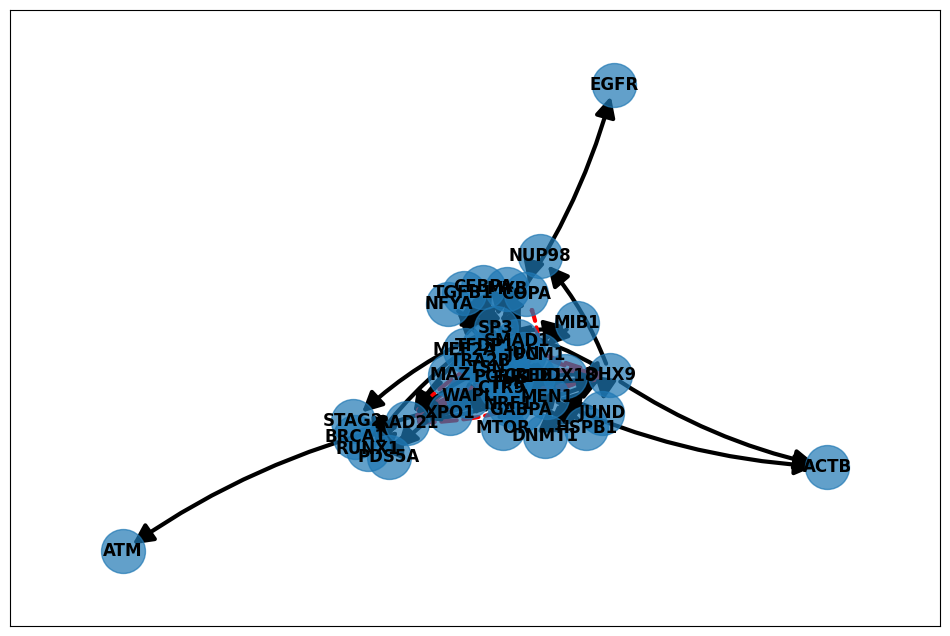

In [139]:
gcm_tpr_obs_network = pd.read_csv("../../data/INDRA_networks/Talus_networks/GCM_TPR_obs.tsv", sep="\t")
gcm_tpr_obs_dag = GraphBuilder(gcm_tpr_obs_network, msstats_data, True)

gcm_tpr_obs_dag.build_full_graph(data_type="LF",
                        protein_format="Gene_Name_Organism",
                        source_name="source_hgnc_symbol",
                        target_name="target_hgnc_symbol")
gcm_tpr_obs_dag.build_dag()
gcm_tpr_obs_dag.create_latent_graph()
gcm_tpr_obs_dag.plot_latent_graph(figure_size=(12, 8))


## Fit SCM

In [140]:
lvm = LVM(gcm_tpr_obs_dag.experimental_data.reset_index(drop=True), 
          gcm_tpr_obs_dag.causal_graph)
lvm.prepare_graph()
lvm.prepare_data()

lvm.fit_model(num_steps=2000)
#lvm.intervention("obs_Ras", "Erk", 3.)

starting training
-14046.222544789314
-15365.443142563105
-16559.261977508664
-17299.747775375843
-17807.002797186375
-18149.486999809742
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/kohler.d/opt/anaconda3/envs/MScausality/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/v7/y32f7x653v9cx3jmt128bnhh0000gp/T/ipykernel_21464/617380356.py", line 6, in <module>
    lvm.fit_model(num_steps=2000)
  File "/Users/kohler.d/Library/CloudStorage/OneDrive-NortheasternUniversity/Northeastern/Research/Causal_Inference/MS_causal_inference/MScausality/src/MScausality/causal_model/LVM.py", line 340, in fit_model
  File "/Users/kohler.d/opt/anaconda3/envs/MScausality/lib/python3.11/site-packages/pyro/infer/svi.py", line 145, in step
    loss = self.loss_and_grads(self.model, self.guide, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/kohler.d/opt/anaconda3/envs/MScausality/lib/python3.11/site-packages/pyro/infer/trace_elbo.py", line 140, in loss_and_grads
    for model

In [77]:
lvm.intervention("obs_MEN1", "SP3", .36)

In [23]:
lvm.input_data

,1433B,1433E,1433F,1433G,1433S,1433T,1433Z,2A5A,2A5D,2A5E,...,ZO2,ZRAB2,ZSC25,ZSC26,ZSWM3,ZW10,ZXDA,ZY11B,ZYX,ZZZ3
0,0.794127,0.227637,0.125587,0.591090,1.456431,-0.115869,0.955365,-1.280480,-0.545953,-0.919969,...,-0.340221,1.319757,-1.111099,-0.580527,-0.578217,-0.540138,-0.295783,-3.002831,-0.471871,-0.361203
1,0.790761,0.218196,-0.010103,0.686272,0.000000,0.000942,0.924707,-1.254313,-0.558445,-0.986943,...,-0.532708,1.406616,-1.078104,-0.521109,0.000000,-0.510579,-0.304355,-2.145825,-0.494692,-0.076690
2,0.706982,0.198750,-0.023004,0.597258,0.000000,0.094094,0.913176,-1.319419,-0.481494,-0.898977,...,-0.562471,1.286934,-1.152730,-0.443207,-0.103578,-0.677602,-0.159837,-1.114281,-0.453305,-0.102297
3,0.678323,0.152964,-0.010496,0.652903,1.318742,-0.095398,0.886695,-1.100218,-0.546555,-0.819516,...,-0.629880,1.318664,-0.916068,-1.035606,-0.186865,-0.925205,-0.243484,-1.063251,-0.337125,-0.142417
4,0.637647,0.112116,-0.177317,0.636311,0.000000,-0.114504,0.907911,-1.175154,-0.438522,-0.922018,...,-0.484406,1.386241,-1.023213,-0.446321,-0.259316,-0.748037,-0.043308,-0.876779,-0.570169,-0.158505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.747972,0.122914,-0.015548,0.641052,0.000000,0.065657,0.836931,-1.284120,-0.675177,-0.817672,...,-0.700953,1.081657,-0.976300,-0.688662,-0.388785,-0.651729,-0.190502,-0.900674,-0.565814,-0.229739
128,0.698817,-0.009795,0.054163,0.547934,1.353358,-0.028861,0.792043,0.000000,-0.713448,0.000000,...,-0.818763,1.185561,-1.303854,-0.433775,-0.369423,-0.572154,-0.233028,0.000000,-0.259071,-0.128185
129,0.739941,0.057443,0.053100,0.536312,1.496782,-0.176349,0.826946,0.000000,-0.898787,-1.383545,...,-0.676345,1.174519,-1.107689,-0.675488,-0.643388,-1.197000,-0.238491,0.000000,-0.363268,-0.434328
130,0.805950,-0.092603,-0.067571,0.651491,1.654963,-0.040889,0.853129,-1.502911,-0.673505,-1.135796,...,-0.663105,1.139413,-1.125973,-0.465342,-0.353306,-1.068120,-0.424077,-1.402589,-0.570371,-0.110318


In [78]:
lvm.parameters[lvm.parameters["parameter"].str.contains("MEN1")]

,parameter,mean,scale
41,MEN1_intercept,-0.09708704,0.014222081
42,MEN1_JUND_coef,0.38164672,0.07967288
43,MEN1_CREB1_coef,-0.11752578,0.017731322
44,MEN1_DNMT1_coef,-0.094443455,0.008988624
45,MEN1_PCBP1_coef,0.26368243,0.010466418
46,MEN1_HSPB1_coef,-0.05049338,0.02869593
47,MEN1_JUN_coef,-0.3642633,0.0273568
48,MEN1_scale,-1.9362051,0.060262255
51,ACTB_MEN1_coef,0.022522287,0.037890658
54,BRCA1_MEN1_coef,0.15097626,0.066368975


<Axes: >

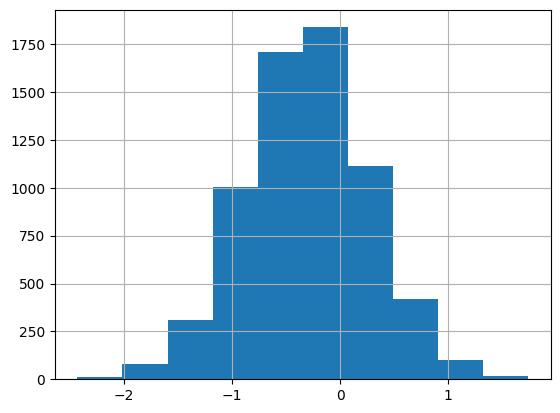

In [79]:
pd.Series(lvm.intervention_samples).hist()

<Axes: >

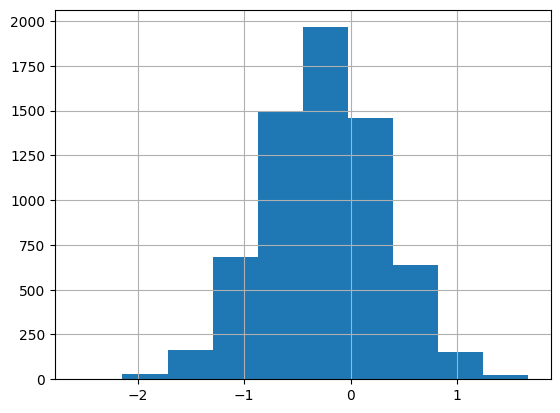

In [80]:
pd.Series(lvm.posterior_samples).hist()

In [81]:
lvm.intervention_samples.mean() - lvm.posterior_samples.mean()

tensor(-0.0608)

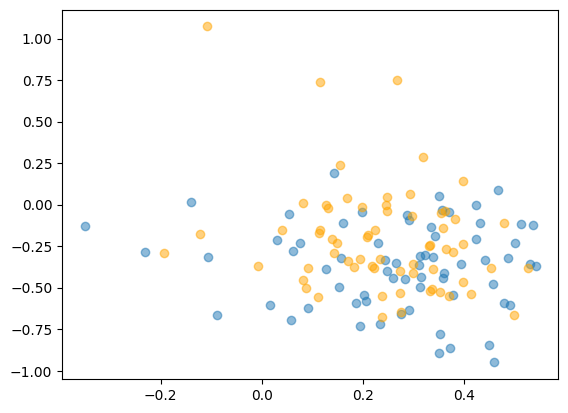

In [84]:
plot_data = lvm.imputed_data[lvm.imputed_data["protein"].isin(["MEN1", "SP3"])]
# pivot wide
raf_data = plot_data[plot_data["protein"] == "MEN1"]
mek_data = plot_data[plot_data["protein"] == "SP3"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(raf_data["intensity"], mek_data["intensity"], alpha=.5)
ax.scatter(raf_data["imp_mean"], mek_data["intensity"], alpha=.5, color="orange")
ax.scatter(raf_data["intensity"], mek_data["imp_mean"], alpha=.5, color="orange")
ax.scatter(raf_data["imp_mean"], mek_data["imp_mean"], alpha=.5, color="red")

In [44]:
testing = msstats_data_all[(msstats_data_all["GROUP"].str.contains("VTP"))]# & \
                #  ((msstats_data_all["Protein"].str.contains("MEN1")) | \
                #   (msstats_data_all["Protein"].str.contains("TGFB1")))]

testing = gs.prep_msstats_data(testing, gene_map=None, parse_gene=True)


/Users/kohler.d/Library/CloudStorage/OneDrive-NortheasternUniversity/Northeastern/Research/Causal_Inference/MS_causal_inference/MScausality/src/MScausality/data_analysis/gene_set.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Protein'] = data['Protein'].apply(lambda x: x.split("_")[0])


In [46]:
testing.loc[:, ["MEN1", "TGFB1"]]

Protein,MEN1,TGFB1
originalRUN,,
230719_THP-1_Chrom_end2end_Plate1_VTP50469_A06_DIA,11.027465,8.647722
230719_THP-1_Chrom_end2end_Plate1_VTP50469_A11_DIA,11.546278,8.676902
230719_THP-1_Chrom_end2end_Plate1_VTP50469_C07_DIA,11.500521,8.753650
230719_THP-1_Chrom_end2end_Plate1_VTP50469_E01_DIA,11.540257,8.473667
230719_THP-1_Chrom_end2end_Plate1_VTP50469_F06_DIA,11.390348,8.471698
230719_THP-1_Chrom_end2end_Plate1_VTP50469_F09_DIA,11.332887,8.128782
230719_THP-1_Chrom_end2end_Plate2_VTP50469_B09_DIA,11.687551,8.812547
230719_THP-1_Chrom_end2end_Plate2_VTP50469_C06_DIA,10.496287,8.975385
230719_THP-1_Chrom_end2end_Plate2_VTP50469_F12_DIA,11.442063,NaN


In [49]:
msstats_model.head()

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,issue,MissingPercentage,ImputationPercentage
0,1433B_HUMAN,DMSO-DbET6,-0.007835,0.127585,-0.061409,260.0,0.951080,0.999700,NaN,0.085235,0.0
1,1433B_HUMAN,DMSO-Jakafi,0.251097,0.131069,1.915757,260.0,0.056493,0.755744,NaN,0.085135,0.0
2,1433B_HUMAN,DMSO-K784-3183,0.176434,0.127585,1.382875,260.0,0.167890,0.998260,NaN,0.087919,0.0
3,1433B_HUMAN,DMSO-K784-3670,0.051602,0.127585,0.404452,260.0,0.686213,0.998793,NaN,0.087919,0.0
4,1433B_HUMAN,DMSO-K975,0.170898,0.127585,1.339483,260.0,0.181583,0.999230,NaN,0.081208,0.0


In [73]:
msstats_model[(msstats_model["Label"] == "DMSO-VTP50469") & \
                (msstats_model["Protein"].isin(["MEN1_HUMAN", "TGFB1_HUMAN",
                                                "SP3_HUMAN", "RAD21_HUMAN",
                                                "DDX18_HUMAN", "PCM1_HUMAN",
                                                "TPR_HUMAN", "TRA2B_HUMAN",
                                                "ACTB_HUMAN", "BRCA1_HUMAN"]))]

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,issue,MissingPercentage,ImputationPercentage
3383,ACTB_HUMAN,DMSO-VTP50469,-0.009773,0.079805,-0.122458,260.0,9.026310e-01,9.984190e-01,NaN,0.005369,0.0
19718,BRCA1_HUMAN,DMSO-VTP50469,-0.077704,0.129946,-0.597971,252.0,5.503963e-01,9.984190e-01,NaN,0.448322,0.0
43028,DDX18_HUMAN,DMSO-VTP50469,-0.097756,0.082036,-1.191627,260.0,2.344943e-01,9.984190e-01,NaN,0.134899,0.0
104093,MEN1_HUMAN,DMSO-VTP50469,0.762448,0.108135,7.050877,260.0,1.601275e-11,7.910297e-08,NaN,0.072483,0.0
129248,PCM1_HUMAN,DMSO-VTP50469,-0.029904,0.077125,-0.387733,260.0,6.985305e-01,9.984190e-01,NaN,0.202685,0.0
147383,RAD21_HUMAN,DMSO-VTP50469,-0.051436,0.081795,-0.628842,260.0,5.300046e-01,9.984190e-01,NaN,0.059060,0.0
180053,SP3_HUMAN,DMSO-VTP50469,-0.156819,0.182121,-0.861070,122.0,3.908885e-01,9.984190e-01,NaN,0.471141,0.0
195398,TGFB1_HUMAN,DMSO-VTP50469,-0.124839,0.120247,-1.038196,235.0,3.002459e-01,9.984190e-01,NaN,0.181879,0.0
201743,TPR_HUMAN,DMSO-VTP50469,-0.027604,0.081150,-0.340165,260.0,7.340066e-01,9.984190e-01,NaN,0.017450,0.0
202148,TRA2B_HUMAN,DMSO-VTP50469,0.008010,0.075874,0.105568,260.0,9.160066e-01,9.984190e-01,NaN,0.001342,0.0


In [53]:
msstats_data_all = norm.normalize(msstats_data_all)

In [100]:
blah = msstats_data_all[((msstats_data_all["GROUP"].str.contains("VTP")) | (msstats_data_all["GROUP"].str.contains("DMSO"))) & \
                 (msstats_data_all["Protein"].str.contains("MEN1"))]
# blah = gs.prep_msstats_data(blah, gene_map=None, parse_gene=True)


In [ ]:
0.2529555729449725
0.16777798453876513

11.71465459492939
0.3592502201802852
10.945547841912923
0.5589455456013044


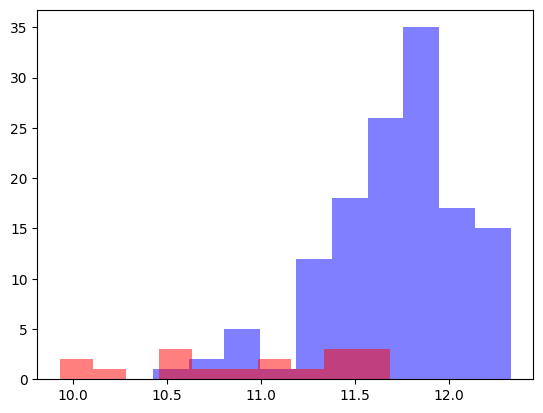

In [102]:
fig, ax = plt.subplots()

ax.hist(blah.loc[blah["GROUP"] == "DMSO", "LogIntensities"], bins=10, alpha=.5, color="blue")
ax.hist(blah.loc[blah["GROUP"] == "VTP50469", "LogIntensities"], bins=10, alpha=.5, color="red")

print(blah.loc[blah["GROUP"] == "DMSO", "LogIntensities"].mean())
print(blah.loc[blah["GROUP"] == "DMSO", "LogIntensities"].std())

print(blah.loc[blah["GROUP"] == "VTP50469", "LogIntensities"].mean())
print(blah.loc[blah["GROUP"] == "VTP50469", "LogIntensities"].std())

-0.04769881061167425

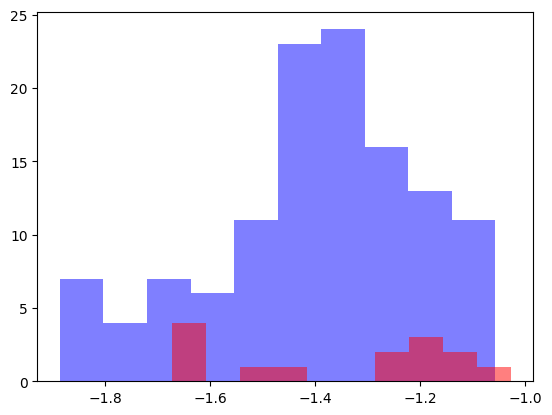

In [65]:
blah = msstats_data_all[((msstats_data_all["GROUP"].str.contains("VTP")) | (msstats_data_all["GROUP"].str.contains("DMSO"))) & \
                 (msstats_data_all["Protein"].str.contains("TGFB1"))]

fig, ax = plt.subplots()

ax.hist(blah.loc[blah["GROUP"] == "DMSO", "LogIntensities"], bins=10, alpha=.5, color="blue")
ax.hist(blah.loc[blah["GROUP"] == "VTP50469", "LogIntensities"], bins=10, alpha=.5, color="red")

blah.loc[blah["GROUP"] == "DMSO", "LogIntensities"].mean() - blah.loc[blah["GROUP"] == "VTP50469", "LogIntensities"].mean()

(array([2.840e+03, 1.746e+03, 2.870e+02, 9.100e+01, 2.300e+01, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.23043847e-04, 2.17873438e-01, 4.35323833e-01, 6.52774227e-01,
        8.70224621e-01, 1.08767502e+00, 1.30512541e+00, 1.52257580e+00,
        1.74002620e+00, 1.95747659e+00, 2.17492699e+00]),
 <BarContainer object of 10 artists>)

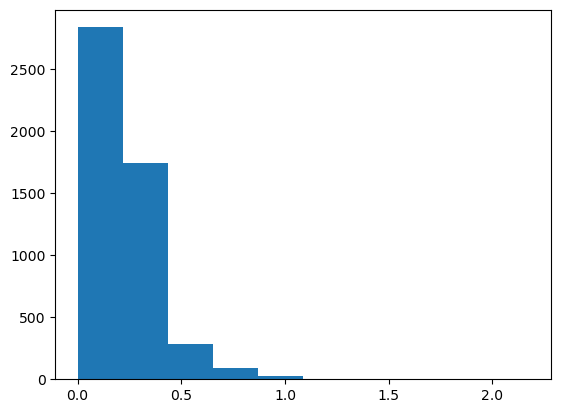

In [22]:
plt.hist(msstats_data.groupby("Protein")["LogIntensities"].std().values)

In [11]:
msstats_data.head()

,RUN,Protein,LogIntensities,originalRUN,GROUP,SUBJECT,TotalGroupMeasurements,NumMeasuredFeature,MissingPercentage,more50missing,NumImputedFeature
0,1,1433B,0.794127,230719_THP-1_Chrom_end2end_Plate1_DMSO_A02_DIA,DMSO,2,1210,10,0.0,False,0
1,2,1433B,0.790761,230719_THP-1_Chrom_end2end_Plate1_DMSO_A05_DIA,DMSO,5,1210,10,0.0,False,0
2,3,1433B,0.706982,230719_THP-1_Chrom_end2end_Plate1_DMSO_A10_DIA,DMSO,10,1210,10,0.0,False,0
3,4,1433B,0.678323,230719_THP-1_Chrom_end2end_Plate1_DMSO_A12_DIA,DMSO,12,1210,10,0.0,False,0
4,5,1433B,0.637647,230719_THP-1_Chrom_end2end_Plate1_DMSO_B01_DIA,DMSO,13,1210,10,0.0,False,0


In [29]:
import numpy as np


def validate_model(model, data, source, target, group1, group2, parse_gene=False, gene_map=None):
    """
    Validate a model using the provided data.
    
    Parameters
    ----------
    model : MScausality.causal_model.LVM
        The model to validate. Must be trained using SVI.
    data : MSstats protein level results
        The data to use for validation.
    source : String protein (gene) name
        The protein to intervene on.
    target : String protein (gene) name
        The protein to measure the effect on.
    
    Returns
    -------
    dict
        A dictionary containing the results of the validation.
    """

    if parse_gene:
        data['Protein'] = data['Protein'].apply(lambda x: x.split("_")[0])

    if gene_map is not None:
        data = pd.merge(data, gene_map, how='left', left_on='Protein', right_on='From')
        data['Protein'] = data['To']

    # Determine what intervention to make
    # figure out how many standard deviations the fold change is
    p1_data = data.loc[data["Protein"] == source]
    true_perturb_std = determine_effect(p1_data, group1, group2)

    p2_data = data.loc[data["Protein"] == target]
    true_effect_std = determine_effect(p2_data, group1, group2)

    intervention_effect = model.input_data.loc[:, source].std() * true_perturb_std
    true_ace = model.input_data.loc[:, target].std() * true_effect_std

    # Make the intervention
    model.intervention(source, target, intervention_effect)

    # Compare to target
    pred_ace = model.intervention_samples.mean() - model.posterior_samples.mean()

    # Calculate the error
    error = np.abs(pred_ace - true_ace)

    return error

def determine_effect(data, g1, g2):

    mu1 = data.loc[data["GROUP"] == g1, "LogIntensities"].mean()
    mu2 = data.loc[data["GROUP"] == g2, "LogIntensities"].mean()
    mu = mu2 - mu1

    std1 = data.loc[data["GROUP"] == g1, "LogIntensities"].std()
    std2 = data.loc[data["GROUP"] == g2, "LogIntensities"].std()
    std = np.sqrt(std1**2 + std2**2)

    return mu / std

In [25]:
msstats_data_all = norm.normalize(msstats_data_all)

In [30]:
validate_model(lvm, msstats_data_all, "MEN1", "TGFB1", "DMSO", "VTP50469", parse_gene=True)

tensor(0.1383)